# Detecting customers at risk of churn using Machine Learning

#### Project Outline
+ Problem
+ Motivation
+ Dataset Information
+ Feature Processing and Feature Engineering
+ Machiine Learning Model Development
+ Prediction/Result
+ Evaluating the result/metrics
+ Conclusion

### Problem Statement
+ Customer retention is one of the primary growth pillars for products with a subscription-based business model. Several bad experiences – or even one – and a customer may quit. And if droves of unsatisfied customers churn at a clip, both material losses and damage to reputation would be enormous.
+ Customer churn (or customer attrition) is a tendency of customers to abandon a brand and stop being a paying client of a particular business.
+ Companies that constantly monitor how people engage with products, encourage clients to share opinions, and solve their issues promptly have greater opportunities to maintain mutually beneficial client relationships.
+ Many surveys focusing on customer acquisition and retention costs are available online. According to this one by Invesp, conversion rate optimization company, getting a new customer may cost up to five times more than retaining an existing customer.
+ Sales, customer success, and marketing teams can also use the knowledge from the data analysis to align their actions.
+ Since we are using an already labelled dataset to build a predictive model our task will be a supervised machine learning problem
+ Therefore we will be using a supervised machine learning classification approach to solve our problem.
+ Based on the number of target class we have will will need to build a binary classifier type of ML model.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [5]:
df = pd.read_csv("Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#checking for the number of rows and columns
df.shape

(10000, 14)

In [7]:
#checking column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#checking for the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
#checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#checking for the value count of the target column
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Narative:
+ The dataset target column is imbalance

In [10]:
#Descriptive statistics of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#checking for distinct observations
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
#dropping unnecessary columns
df.drop(['RowNumber'], axis = 1, inplace = True)
df.drop(['CustomerId'], axis = 1, inplace = True)
df.drop(['Surname'], axis = 1, inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
cat_col = ['Geography','Gender']
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [14]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

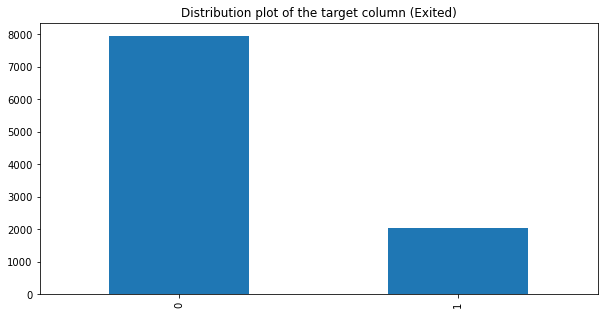

In [15]:
#plotting the dist of the data as per the target column 
plt.figure(figsize = (10,5))
plt.title("Distribution plot of the target column (Exited)")
df['Exited'].value_counts().plot(kind = 'bar')
plt.show()

In [16]:
#checking for value count of geography
df['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [17]:
#checking for value count of ,gender,
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

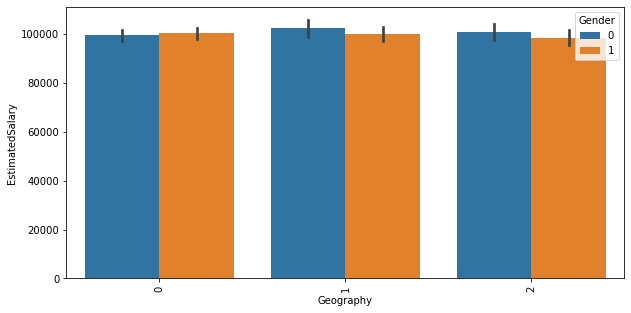

In [18]:
#visualizing the Geography column vs estimated salary
plt.figure(figsize  = (10,5))
plt.xticks(rotation = 90)
sns.barplot(x='Geography', y='EstimatedSalary', hue='Gender', data=df)

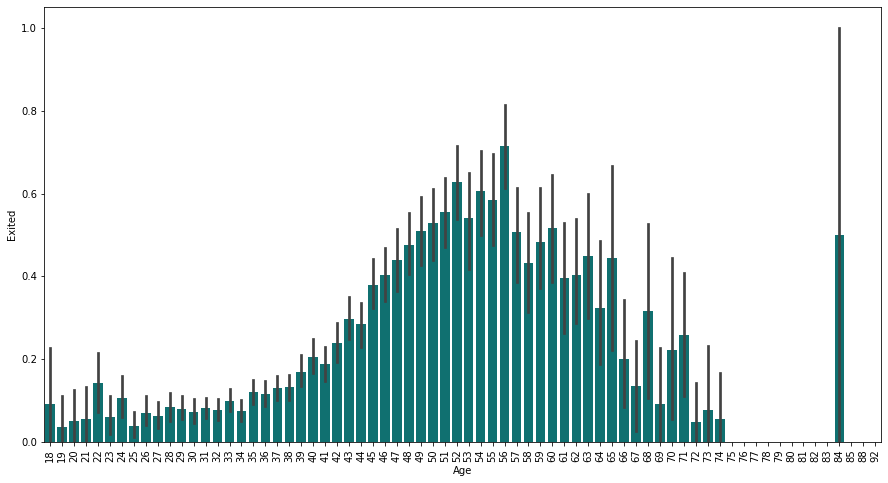

In [19]:
# Visualizing barplot where age is taken on x axis and exited in on y axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Exited',color='teal',data=df);


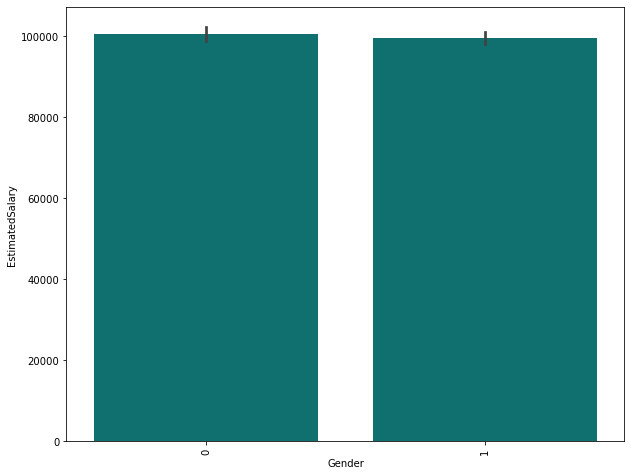

In [20]:
# Visualizing barplot where gender is taken on x axis and estimated salary is taken on y axis
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='EstimatedSalary',color='teal',data=df);

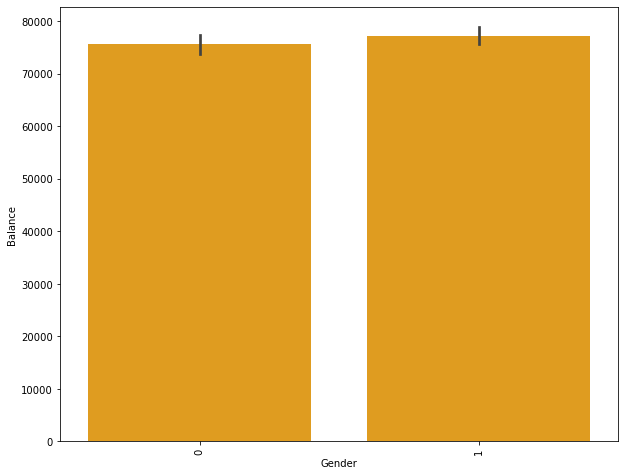

In [21]:
# Visualizing barplot where Gender is taken on x axis and Balance is taken on y axis
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='Balance',color='orange',data=df);


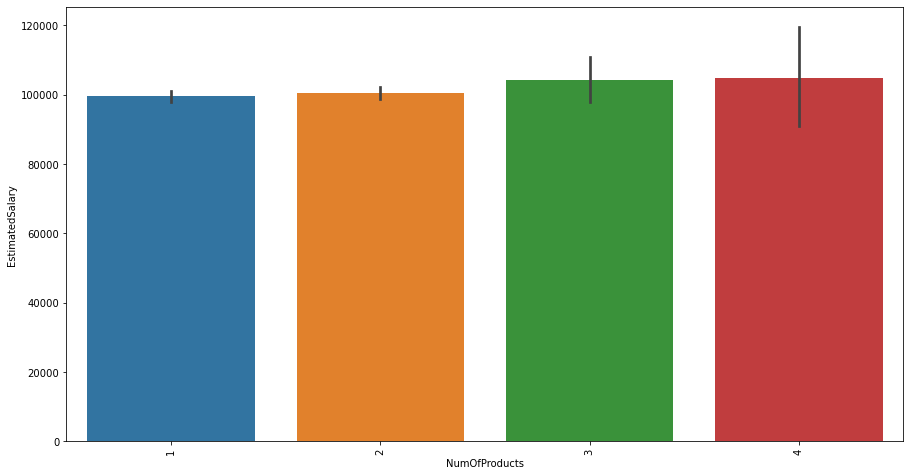

In [22]:
# Visualizing barplot where NumOfProducts is taken on x axis and EstimatedSalary is taken on y axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='NumOfProducts',y='EstimatedSalary',data=df);

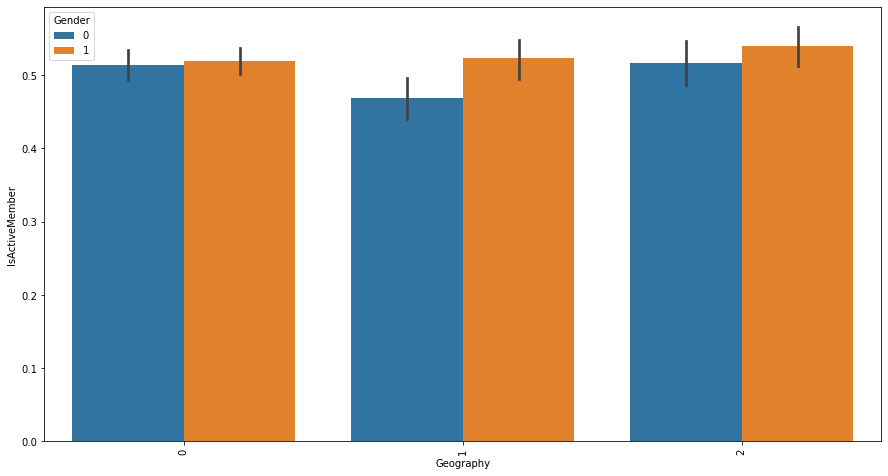

In [23]:
# Visualizing barplot where IsActiveMember is taken on y axis and Geography is taken on x axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(y='IsActiveMember',x='Geography',hue='Gender',data=df);

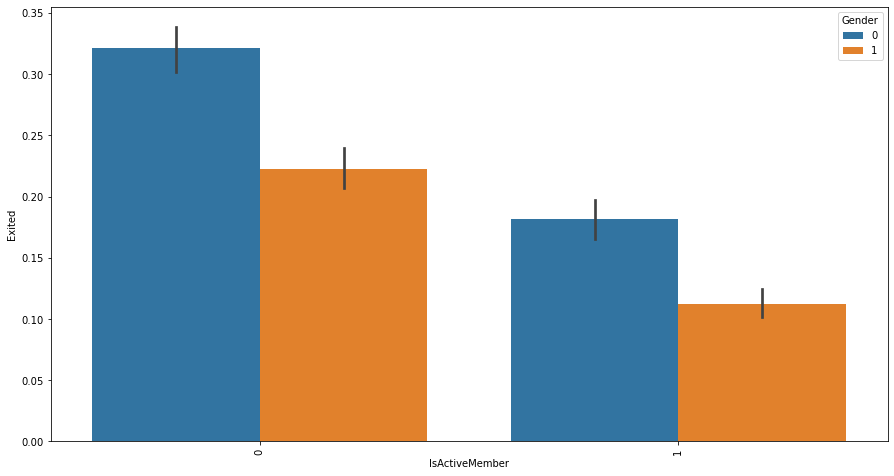

In [24]:
# Visualizing barplot where IsActiveMember is taken on x axis and Exited is taken on y axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Exited',hue='Gender',data=df);


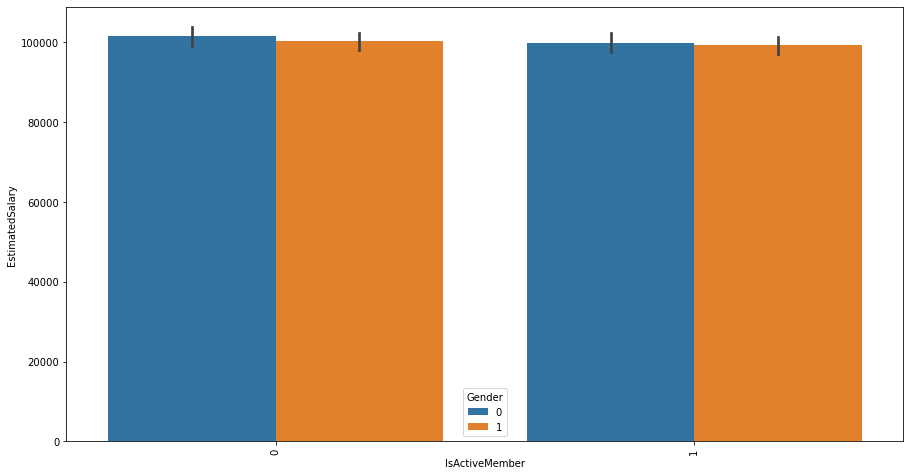

In [25]:
# Visualizing barplot where IsActiveMember is taken on x axis and EstimatedSalary is taken on y axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df);

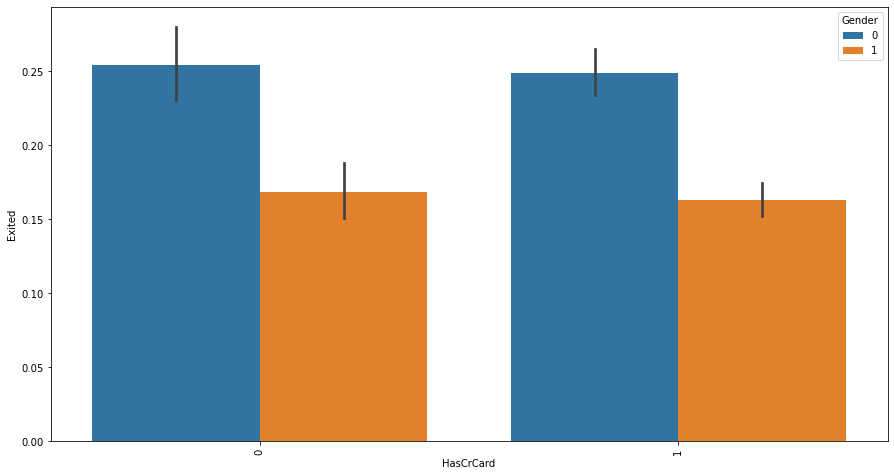

In [26]:
# Visualizing barplot where HasCrCard is taken on x axis and Exited is taken on y axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='HasCrCard',y='Exited',hue='Gender',data=df); 


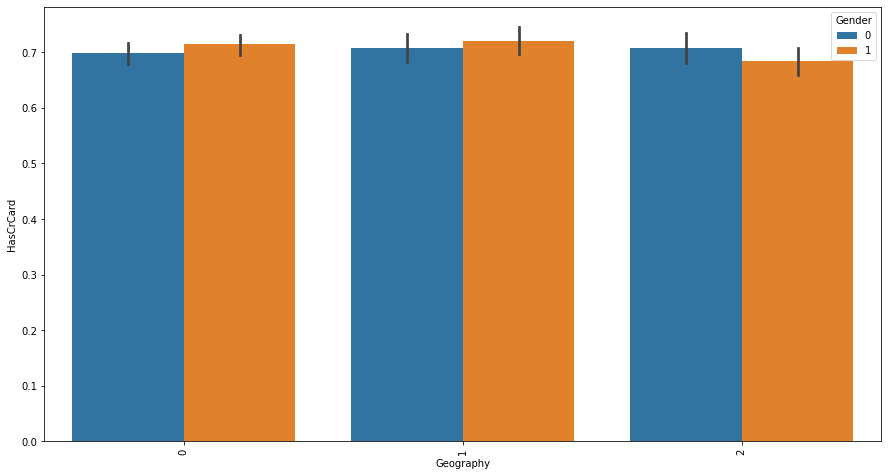

In [27]:

# Visualizing barplot where HasCrCard is taken on x axis and Geography is taken on y axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(y='HasCrCard',x='Geography',hue='Gender',data=df);

#### Distribution plot

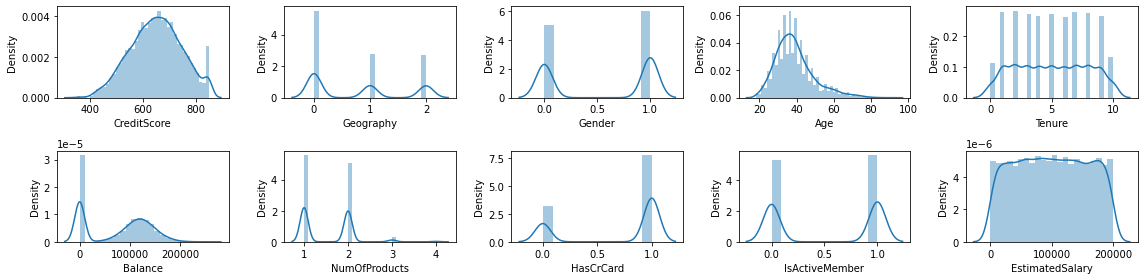

In [28]:
rows=2
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()
# Distribution plot will help us to check if the data is skewed or not

#### correlation analysis on the features

In [29]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


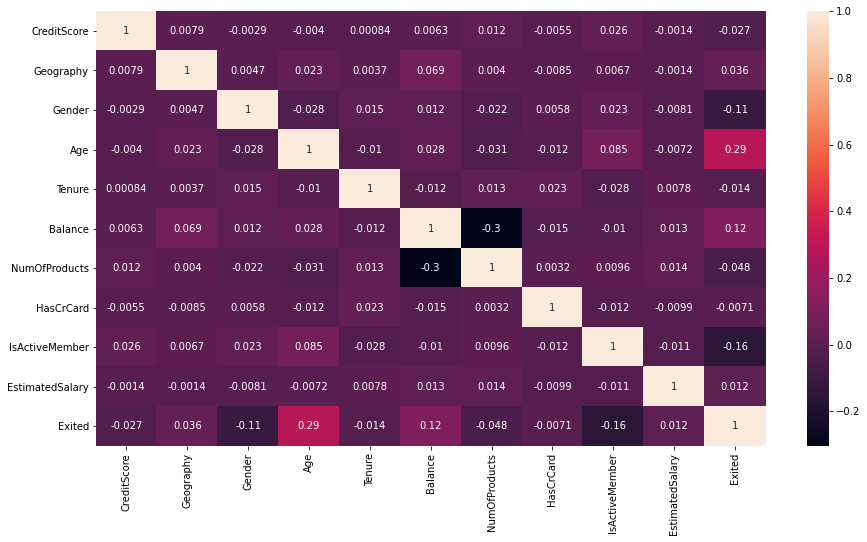

In [30]:
#plotting correlation with heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
corr_matrix = df.corr()

<AxesSubplot:>

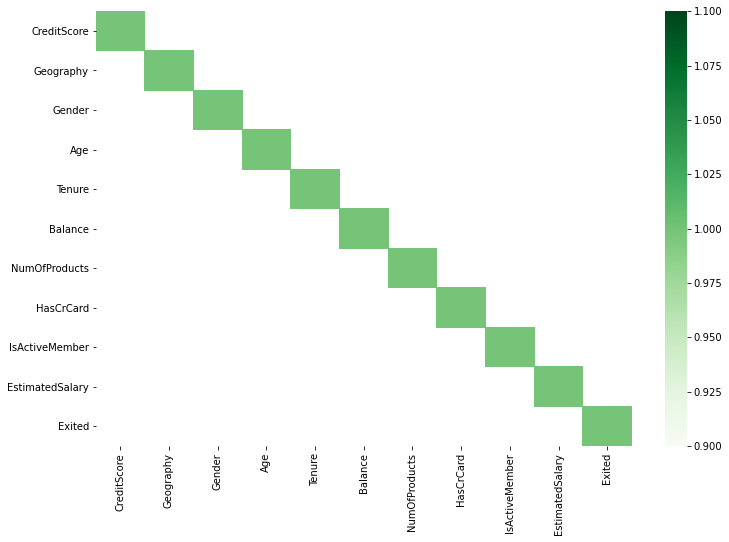

In [32]:
highest_corr = corr_matrix[corr_matrix>.3]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, cmap="Greens")

In [33]:
#list features with the highest correlation coefficient
s = corr_matrix.abs().unstack()
top_features_per_correlation = s.sort_values(kind="quicksort")

In [34]:
print(top_features_per_correlation)

CreditScore      Tenure             0.000842
Tenure           CreditScore        0.000842
EstimatedSalary  Geography          0.001369
Geography        EstimatedSalary    0.001369
CreditScore      EstimatedSalary    0.001384
                                      ...   
Age              Age                1.000000
Gender           Gender             1.000000
Geography        Geography          1.000000
EstimatedSalary  EstimatedSalary    1.000000
Exited           Exited             1.000000
Length: 121, dtype: float64


In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.to_csv('bank_customer_churn_clean.csv')

#### Feature Processing and Feature Engineering

In [35]:
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [51]:
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember','Balance','EstimatedSalary']]
y = df['Exited']

In [52]:
# Find the best features using Selectkbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y)

In [53]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [54]:
feature_column_names = pd.DataFrame(X.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [55]:
# List Features
best_feat_df

,Feature_Scores,Feature_name
0,1.054035e+02,CreditScore
1,1.185325e+01,Geography
2,5.153993e+01,Gender
3,2.300417e+03,Age
4,3.270538e+00,Tenure
5,5.055394e+00,NumOfProducts
6,1.500410e-01,HasCrCard
7,1.181994e+02,IsActiveMember
8,7.151303e+06,Balance
9,4.835088e+04,EstimatedSalary


In [56]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
8,7.151303e+06,Balance
9,4.835088e+04,EstimatedSalary
3,2.300417e+03,Age
7,1.181994e+02,IsActiveMember
0,1.054035e+02,CreditScore
2,5.153993e+01,Gender
1,1.185325e+01,Geography
5,5.055394e+00,NumOfProducts
4,3.270538e+00,Tenure
6,1.500410e-01,HasCrCard


#### Which of these features are important using ExtraTreesClassifier

In [57]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [58]:
# Print Important
print(et_clf.feature_importances_)

[0.13420808 0.04383079 0.0163411  0.23906637 0.10438088 0.14345396
 0.02152754 0.03380563 0.13023072 0.13315492]


In [59]:
# Convert to a Dataframe
feature_importance_df = pd.Series(et_clf.feature_importances_,index=X.columns)

In [60]:
feature_importance_df.head()

CreditScore    0.134208
Geography      0.043831
Gender         0.016341
Age            0.239066
Tenure         0.104381
dtype: float64

<AxesSubplot:>

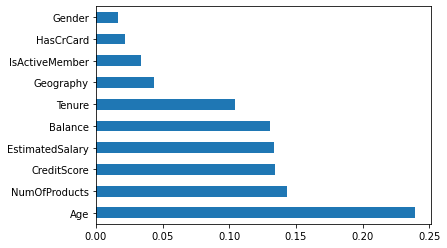

In [61]:
feature_importance_df.nlargest(12).plot(kind='barh')

### Machine Learning Model Development

#### Splitting the dataset into Training set and Testing set

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [65]:
X

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Balance,EstimatedSalary
0,619,0,0,42,2,1,1,1,0.00,101348.88
1,608,2,0,41,1,1,0,1,83807.86,112542.58
2,502,0,0,42,8,3,1,0,159660.80,113931.57
3,699,0,0,39,1,2,0,0,0.00,93826.63
4,850,2,0,43,2,1,1,1,125510.82,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,2,1,0,0.00,96270.64
9996,516,0,1,35,10,1,1,1,57369.61,101699.77
9997,709,0,0,36,7,1,0,1,0.00,42085.58
9998,772,1,1,42,3,2,1,0,75075.31,92888.52


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, 8:10] = sc.fit_transform(X_train.iloc[:, 8:10])
X_test.iloc[:, 8:10] = sc.transform(X_test.iloc[:, 8:10])

#### Model Development

In [70]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [71]:
#checking for the accuracy of the model
lr_model.score(X_test,y_test)

0.813

In [72]:
# Check Model Accuracy
y_pred = lr_model.predict(X_test)

In [73]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of LR Model:{}".format(accuracy_score(y_test,y_pred)))

Accuracy of LR Model:0.813


#### Narrative:
+ Using the LogisticRegression ML Estimator our model had an accuracy score of 0.813(81.3%)
+ We will have to evaluate our model with other metrics such as classification report (since this is a classification problem) and confusion matrix
#### Evaluation of Model
- Using Classification Report
   + This function creates a text report showing the main classification metrics such as precision,recall,f1-score
   + Precision: refers to the ability of the classifier not to label as positive a sample that is negative,
   + Recall: refers to the ability of the classifier to find all the positive samples.
- Using Confusion Matrix
- ROC Curve
- Precision Recall Curve

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,precision_score,recall_score,f1_score

In [76]:
#classification report
print(classification_report(y_test,y_pred,))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1595
           1       0.62      0.20      0.30       405

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000



In [78]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[1546,   49],
       [ 325,   80]], dtype=int64)

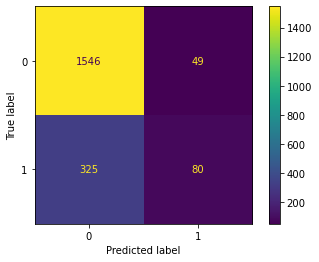

In [79]:
#plotting confusion matrix
plot_confusion_matrix(lr_model,X_test,y_test)

#### RoC Curve
+ Receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
+ It is similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate.
+ A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5 So in our case we had a classifier with an AUC of 0.75

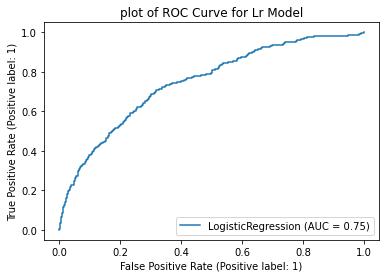

In [80]:
#Roc Curve
plot_roc_curve(lr_model,X_test,y_test)
plt.title("plot of ROC Curve for Lr Model")
plt.show()

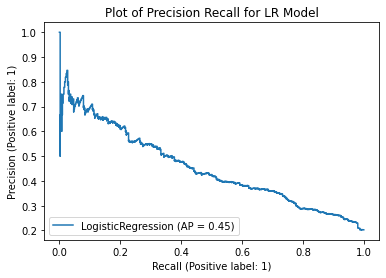

In [82]:
plot_precision_recall_curve(lr_model, X_test, y_test)
plt.title("Plot of Precision Recall for LR Model")
plt.show()

In [86]:
# Method 3
from yellowbrick.classifier import PrecisionRecallCurve,ROCAUC

0.45247793277205867

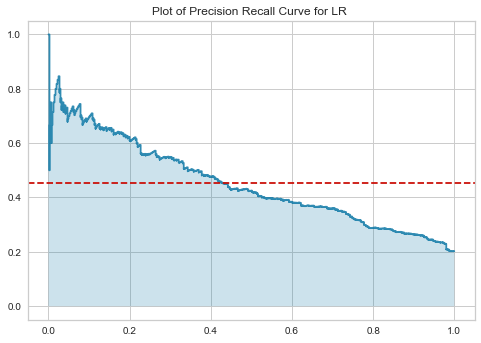

In [88]:
# Plot of PrecisionRecall : usually used for imbalanced dataset
viz = PrecisionRecallCurve(LogisticRegression())
plt.title("Plot of Precision Recall Curve for LR ")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)

0.7468554071593627

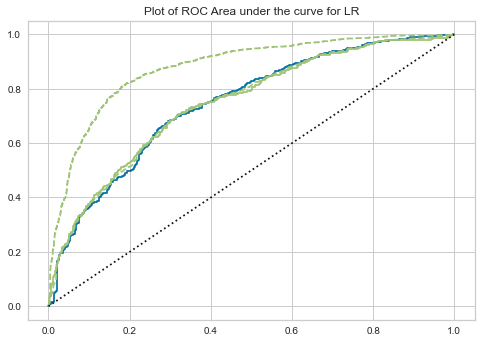

In [89]:
viz = ROCAUC(LogisticRegression())
plt.title("Plot of ROC Area under the curve for LR")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)

#### Cross Validation

In [104]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.73 %
Standard Deviation: 0.74 %


#### Narrative
+ We can improve our model accuracy via hyperparameter tuning to get a higher accuracy

### Comparing the logistic Regression model to:
+ Decision Tree Classifier
+ Random Forest Classifier
+ Support Vector Machine
+ K nearest Classifier
+ naive_bayes

### Decision Tree Classifier

In [131]:
#Training the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

#checking for the accuracy of the model
print("Accuracy of DT Model:{:.2f} %".format(dt_model.score(X_test,y_test)*100))

# Check Model Prediction
y_pred2= dt_model.predict(X_test)
print(y_pred2)

# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of DT Model:{:.2f} %".format(accuracy_score(y_test,y_pred2)*100))


#confusion metrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred2))

#classification report
print("classification report:")
print(classification_report(y_test,y_pred2,))

#Applying cross validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dt_model, X = X_train, y = y_train, cv = 10)
print("Cross validation:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy of DT Model:78.85 %
[0 0 0 ... 0 0 1]
Accuracy of DT Model:78.85 %
confusion matrix:
[[1353  242]
 [ 181  224]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1595
           1       0.48      0.55      0.51       405

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.79      2000

Cross validation:
Accuracy: 78.48 %
Standard Deviation: 1.56 %


### Random Forest Classifier

In [129]:
#dTraining the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

#checking for the accuracy of the model
print("Accuracy of RF Model:{:.2f} %".format(rf_model.score(X_test,y_test)*100))

# Check Model Prediction
y_pred3= rf_model.predict(X_test)
print(y_pred3)

# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of RF Model:{:.2f} %".format(accuracy_score(y_test,y_pred3)*100))


#confusion metrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred3))

#classification report
print("classification report:")
print(classification_report(y_test,y_pred3,))

#Applying cross validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)
print("Cross validation:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy of RF Model:86.05 %
[0 0 0 ... 0 0 0]
Accuracy of RF Model:86.05 %
confusion matrix:
[[1523   72]
 [ 207  198]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Cross validation:
Accuracy: 86.12 %
Standard Deviation: 1.04 %


### Support Vector Machine

In [133]:
#Training the model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

#checking for the accuracy of the model
print("Accuracy of SVM Model:{:.2f} %".format(svm_model.score(X_test,y_test)*100))

# Check Model Prediction
y_pred4= svm_model.predict(X_test)
print(y_pred4)

# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of SVM Model:{:.2f} %".format(accuracy_score(y_test,y_pred4)*100))


#confusion metrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred4))

#classification report
print("classification report:")
print(classification_report(y_test,y_pred4,))

#Applying cross validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_model, X = X_train, y = y_train, cv = 10)
print("Cross validation:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy of SVM Model:80.50 %
[0 0 0 ... 0 0 0]
Accuracy of SVM Model:80.50 %
confusion matrix:
[[1575   20]
 [ 370   35]]
classification report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1595
           1       0.64      0.09      0.15       405

    accuracy                           0.81      2000
   macro avg       0.72      0.54      0.52      2000
weighted avg       0.77      0.81      0.74      2000

Cross validation:
Accuracy: 80.25 %
Standard Deviation: 0.42 %


### Naive Bayes Classifier

In [134]:
#Training the model
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

#checking for the accuracy of the model
print("Accuracy of Naive Bayes Model:{:.2f} %".format(nb_model.score(X_test,y_test)*100))

# Check Model Prediction
y_pred5= nb_model.predict(X_test)
print(y_pred5)

# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of Naive Bayes Model:{:.2f} %".format(accuracy_score(y_test,y_pred5)*100))


#confusion metrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred5))

#classification report
print("classification report:")
print(classification_report(y_test,y_pred5,))

#Applying cross validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb_model, X = X_train, y = y_train, cv = 10)
print("Cross validation:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy of Naive Bayes Model:82.75 %
[0 0 0 ... 0 0 0]
Accuracy of Naive Bayes Model:82.75 %
confusion matrix:
[[1548   47]
 [ 298  107]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.69      0.26      0.38       405

    accuracy                           0.83      2000
   macro avg       0.77      0.62      0.64      2000
weighted avg       0.81      0.83      0.80      2000

Cross validation:
Accuracy: 82.64 %
Standard Deviation: 0.78 %


### K-Nearest Neighbours

In [135]:
#Training the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

#checking for the accuracy of the model
print("Accuracy of KNN Model:{:.2f} %".format(knn_model.score(X_test,y_test)*100))

# Check Model Prediction
y_pred6= knn_model.predict(X_test)
print(y_pred6)

# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of KNN Model:{:.2f} %".format(accuracy_score(y_test,y_pred6)*100))


#confusion metrix
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred6))

#classification report
print("classification report:")
print(classification_report(y_test,y_pred6,))

#Applying cross validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Cross validation:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy of KNN Model:80.25 %
[0 0 0 ... 0 0 0]
Accuracy of KNN Model:80.25 %
confusion matrix:
[[1491  104]
 [ 291  114]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1595
           1       0.52      0.28      0.37       405

    accuracy                           0.80      2000
   macro avg       0.68      0.61      0.62      2000
weighted avg       0.77      0.80      0.78      2000

Cross validation:
Accuracy: 78.49 %
Standard Deviation: 1.01 %


### Using F1 Score to Compare  Models
+ The F1 score is the harmonic mean of precision and recall.
+ The regular mean treats all values equally, while the harmonic mean gives much more weight to low values.
+ Therefore, the classifier will only get a high F1 score if both recall and precision are high.
+ The F1 score favors classifiers that have similar precision and recall.
+ We pick the higher f1 score if we are working on an imbalanced dataset and we are interested in one important class.

In [137]:
# Compare model using F1 Score
from sklearn.metrics import f1_score
f1_for_lr_model = f1_score(y_test, y_pred, average='macro')
f1_for_dt_model = f1_score(y_test, y_pred2, average='macro')
f1_for_rf_model = f1_score(y_test, y_pred3, average='macro')
f1_for_svm_model = f1_score(y_test, y_pred4, average='macro')
f1_for_nb_model = f1_score(y_test, y_pred5, average='macro')
f1_for_knn_model = f1_score(y_test, y_pred6, average='macro')

In [139]:
print("LR F1-score",f1_for_lr_model)
print("DT F1-score",f1_for_dt_model)
print("RF F1-score",f1_for_rf_model)
print("SVM F1-score",f1_for_svm_model)
print("NB F1-score",f1_for_nb_model)
print("KNN F1-score",f1_for_knn_model)

LR F1-score 0.5958600508740877
DT F1-score 0.6895821798155766
RF F1-score 0.7513784461152883
SVM F1-score 0.5210022107590273
NB F1-score 0.6412824619876383
KNN F1-score 0.6245016923566131


##### Random Forest Classifier model performed well compared to other models

## Applying Hyper Parameter Tuning

### RandomSearchCv

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
#defining hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 5000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 2000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 644, 1188, 1733, 2277, 2822, 3366, 3911, 4455, 5000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [148]:
rf1_model = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf1_model,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=100, verbose=2)

In [149]:
#best parameters
rf_randomcv.best_params_

{'n_estimators': 4455,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 894,
 'criterion': 'gini'}

In [151]:
rf_randomcv
# displaying all parameters

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=100, verbose=2)

In [152]:
rf_randomcv.best_estimator_
# Displaying best parameters from all parameters mentioned above

RandomForestClassifier(max_depth=894, min_samples_split=5, n_estimators=4455)

In [153]:
best_random_grid=rf_randomcv.best_estimator_
# saving all parameters in best_random_grid

In [156]:
Y_pred=best_random_grid.predict(X_test)

print(confusion_matrix(y_test,Y_pred))
print("Accuracy Score {} %".format(accuracy_score(y_test,Y_pred)*100))

# Wrong Predictions made.
print((y_test !=y_pred).sum(),'/',((y_test == y_pred).sum()+(y_test != y_pred).sum()))
print('-'*50)

[[1525   70]
 [ 203  202]]
Accuracy Score 86.35000000000001 %
374 / 2000
--------------------------------------------------


**Appying  Cross validation** 

In [157]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = best_random_grid, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.25 %
Standard Deviation: 0.99 %


**Narrative**
+ Hence the randomised search cv on random forest classifier gave us better accuracy which is 86.25% and a std of 0.99% and wrong predictions made by the model are 374/2000

### Saving the model

In [159]:
# Using Joblib
import joblib

In [160]:
print("Joblib",joblib.__version__)

Joblib 0.17.0


In [161]:
# Save rf Model
model_file = open("random_forest_classifier_model_customer_churn_2_oct_2021.pkl","wb")
joblib.dump(best_random_grid,model_file)
model_file.close()

In [162]:
# Save Logistic Regression Model
model_file_lr = open("logistic_Regression_model_customer_churn_2_oct_2021.pkl","wb")
joblib.dump(lr_model,model_file_lr)
model_file_lr.close()

**Model Interpretation**
+ We will be trying to see how our model makes a prediction or classification
+ This allows us to see into our 'black box' model to know how each feature contributes to make a prediction



In [165]:
# Load Model
import eli5


In [170]:
# Show how each feature contributes
eli5.show_weights(best_random_grid)

Weight,Feature
0.2544 ± 0.0442,x3
0.1501 ± 0.0430,x5
0.1404 ± 0.0264,x8
0.1366 ± 0.0258,x9
0.1321 ± 0.0255,x0
0.0713 ± 0.0170,x4
0.0434 ± 0.0285,x7
0.0385 ± 0.0144,x1
0.0178 ± 0.0086,x2
0.0155 ± 0.0075,x6


In [179]:
# Show how each feature contributes
eli5.show_weights(lr_model)

Weight?,Feature
+0.299,x8
+0.087,x1
+0.061,x3
+0.021,x9
-0.003,x0
-0.043,x4
-0.131,x5
-0.149,x6
-0.570,<BIAS>
-0.627,x2


X_test.iloc[7]

In [184]:
# Let us predict on X_test[7]
ex = np.array(X_test.iloc[7]).reshape(1,-1)

In [185]:
best_random_grid.predict(ex)

array([0], dtype=int64)

In [186]:
# Check Prediction Probability
best_random_grid.predict_proba(ex)

array([[0.93039095, 0.06960905]])

**Narrative:**
+ Our model predict our sample as ZERO with a probability of 0.93 or 93.0% certaint

In [188]:
# Show how each feature contributes to our prediction
eli5.show_prediction(best_random_grid,X_test.iloc[7])

## Conclusion
+ Our task was to build an ML Model to predict customer churn in an organization. In our analysis we found out that the following features had a greater importance and influence on our prediction than the others. These features were also helpful in interpreting why our LogisticRegression Model made some classification. These features include:

- Age
- NumOfProducts
- EstimatedSalary
- CreditScore
- Balance
- Tenure
+ Moreover our models LogisticRegression had an accuracy of (0.8073) 80.73%  after cross validation and Random Forest Model had a better model accuracy of (0.8612) 86.12%. After Tuning the Hyper parameters of the rf_model, we found out that even the  rf_model can be improve to give us an accuracy of 0.8625 with a standard deviation of 0.99%.
+ To conclude, we can use these ML models to predict customer churn with a higher accuracy and metrics



+ In general, it’s the overall customer experience that defines brand perception and influences how customers recognize value for money of products or services they use.
+ The reality is that even loyal customers won’t tolerate a brand if they’ve had one or several issues with it.